# Visualizations for ABS
Below is the code used to create the visualizations from the [2019 Annual Business Survey Data](https://www.census.gov/data/developers/data-sets/abs.2019.html)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Load the DataFrames
business_owner_characteristics = pd.read_csv(r'Data\business_owner_characteristics.csv')

#business_characteristics = pd.read_csv(r'Data\business_characteristics.csv')

#company_summary = pd.read_csv(r'Data\company_summary.csv')

#state_company_summary = pd.read_csv(r'Data\state_company_summary.csv')

#tech_characteristics = pd.read_csv(r'Data\tech_characteristics.csv')

## Overall Owner Distributions Across all Industry Sectors
Let's look at owner demographics for businesses across all industry sectors

In [5]:
business_owner_characteristics = business_owner_characteristics[business_owner_characteristics['IndustrySector'] == 'Total for all sectors']

If we wanted to look at the breakdown between hispanic and non-hispanic business owners, we could drill down to the data where all other categories includes aggregates except for the ethnicity

In [6]:
business_owner_ethnicity = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] != 'All owners of respondent firms')]

Since there are multiple questions (as seen by the QuestionDescription), we can aggregate the like values (Non/Hispanic) and get the mean to account for any variations in the differences between the number of responses for each question.

In [8]:
non_total_owner_ethnicity = business_owner_ethnicity.groupby('OwnerEthnicity')['NumberOfOwners'].mean()

Plotting the data

<AxesSubplot:xlabel='OwnerEthnicity'>

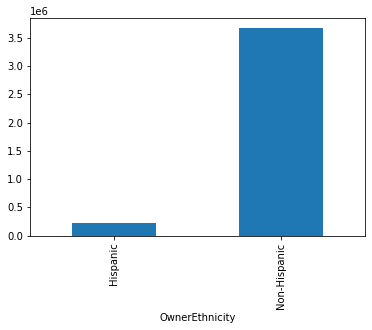

In [9]:
non_total_owner_ethnicity.plot(kind='bar')

Let's do the same but now look at the breakdown by race

In [10]:
#unique values for race
business_owner_race = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerRace'] != 'All owners of respondent firms') & (business_owner_characteristics['OwnerRace'] != 'Minority') & (business_owner_characteristics['OwnerRace'] != 'Nonminority')]

Again, we want to account for any variations in the number of responses for different questions

In [11]:
non_total_owner_race = business_owner_race.groupby('OwnerRace')['NumberOfOwners'].mean()

Now plotting the data

<AxesSubplot:ylabel='OwnerRace'>

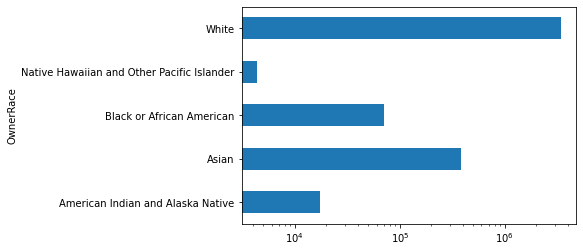

In [12]:
non_total_owner_race.plot(kind='barh', logx=True)

Let's look at how the breakdown compares for business owners by sex

In [13]:
#Unique values for sex
business_owner_sex = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [14]:
non_total_owner_sex = business_owner_sex.groupby('OwnerSex')['NumberOfOwners'].mean()

<AxesSubplot:xlabel='OwnerSex'>

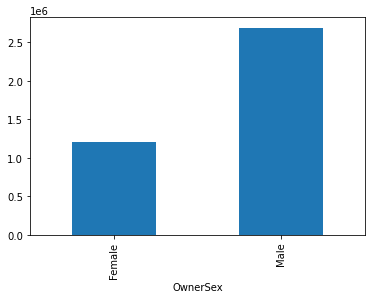

In [15]:
non_total_owner_sex.plot(kind='bar')

For veteran status we could do the following:

In [16]:
#Owner Veteran Status
business_owner_vetstatus = business_owner_characteristics[(business_owner_characteristics['OwnerSex'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerRace'] == 'All owners of respondent firms')
                              & (business_owner_characteristics['VeteranStatus'] != 'All owners of respondent firms')
                              & (business_owner_characteristics['OwnerResp'] == 'Total reporting')
                              & (business_owner_characteristics['OwnerEthnicity'] == 'All owners of respondent firms')]

In [17]:
owner_vet_status = business_owner_vetstatus.groupby('VeteranStatus')['NumberOfOwners'].mean()

<AxesSubplot:xlabel='VeteranStatus'>

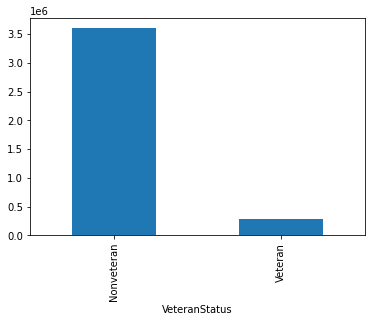

In [18]:
owner_vet_status.plot(kind='bar')